In [1]:
from singularite import eclatements, pairwise_coprime, isJStrict


def ok(n, xs):
    if all(x <= 1 for x in xs):
        return True
    return pairwise_coprime((n, *xs))

def to_tex(n, xs):
    return f'{{[{xs}]}}_{{{n}}}'

def to_s(n, xs):
    return f'{xs}_{n}'

def T(n, xs):
    children, bad = [], set()
    if ok(n, xs):
        for (ni, xi) in eclatements(n, xs):
            subt, subs = T(ni, xi)
            children.append(subt)
            bad |= subs
    else:
        bad |= {(n, xs)}
    return (LabelledOrderedTree(children, label=(n, xs)), bad)

def vis_eval(n, r):
    uncurry = lambda f: lambda p: f(*p)
    t, b = T(n, r)
    assert isJStrict(n, r) == (len(b) == 0)
    if len(b) == 0:
        view(t.map_labels(uncurry(to_tex)))
    else:
        show(t.as_digraph().plot(vertex_color='green', vertex_colors={'red': b, 'cyan': [(n, r)]}, layout='acyclic', vertex_labels=uncurry(to_s)))



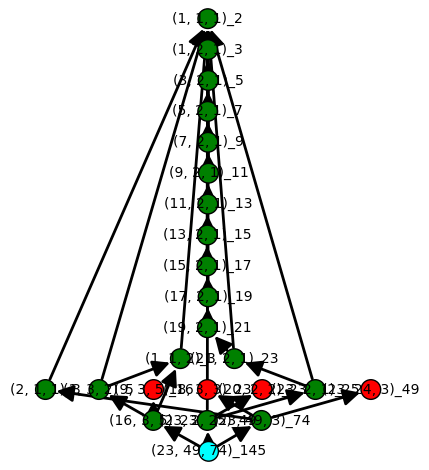

In [46]:
# n, r =  23, (8, 5, 3)
# vis_eval(7, (3, 4, 1))
vis_eval(145, (23, 49, 74))
    

In [69]:
from singularite import pairwise_coprime, group, isJStrict
from itertools import combinations

def pred(n, a, b, c, d=1):
    if d <= 0:
        return True
    if a <= 1 or b <= 1 or c <= 1:
        return False
    if not pairwise_coprime([n, a, b, c]):
        return False
    if a+b>n or a+c>n or b+c>n:
        return False
    if not pred(a, -n%a, b%a, c%a, d-1):
        return False
    if not pred(b, -n%b, a%b, c%b, d-1):
        return False
    if not pred(c, -n%c, a%c, b%c, d-1):
        return False
    return True

# 41, (2, 3, 7)
for n in range(100, 200):
    for (c, b, a) in combinations(group(n), 3):
        if pairwise_coprime([a, b, c]) and c > 1 and isJStrict(a, (b, c)) and isJStrict(b, (a%b, c)):
            print(a, b, c)
        # if isJStrict(a, (b, c)): #and isJStrict(b, (a%b, c)):
        # if pred(n, a, b, c):
        # if pred(n, a, b, c, 3):
        #     print(n, a, b, c)
        #     vis_eval(n, (a, b, c))


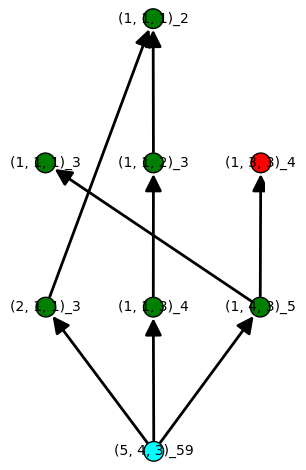

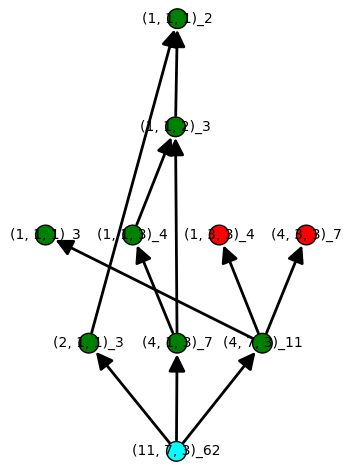

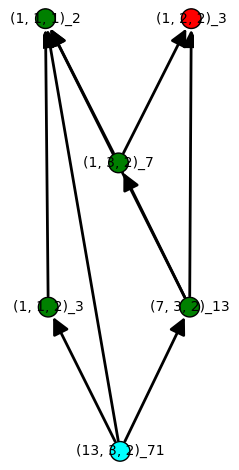

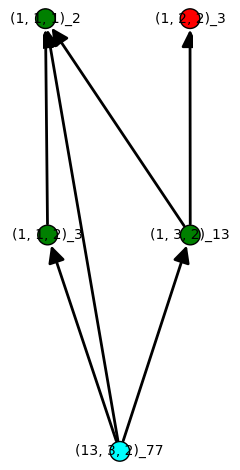

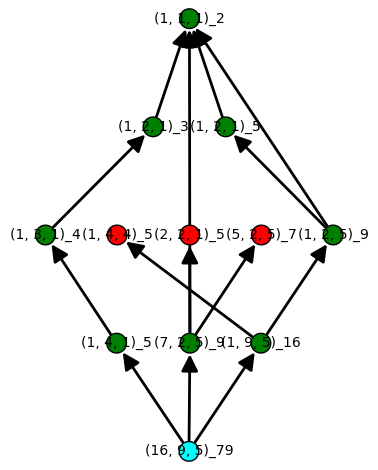

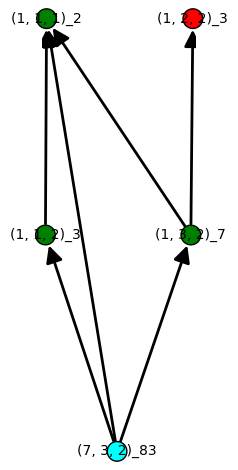

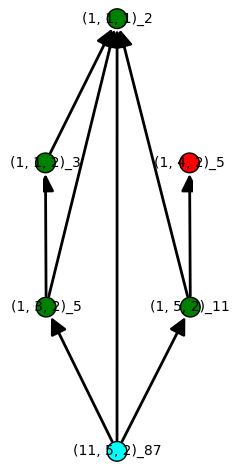

In [9]:
l = [
    (59, (5, 4, 3)),
    (62, (11, 7, 3)),
    (71, (13, 3, 2)),
    (77, (13, 3, 2)),
    (79, (16, 9, 5)),
    (83, (7, 3, 2)),
    (87, (11, 5, 2))
]

for (n, xs) in l:
    vis_eval(n, xs)

In [ ]:
from singularite import coprime, pairwise_coprime, isJStrict
from itertools import combinations

g = lambda n: { x for x in range(2, n) if coprime(x, n) }
a = 13
for b in g(a):
    for k in range(1, 40):
        n = a+b+k*a*b
        c = crt([1, 1], [a, b]) + a*b
        if -n%c == 1:
            print(n, a, b,c , isJStrict(n, (a, b)), isJStrict(n, (a, b, c)))
            vis_eval(n, (a, b, c))

In [42]:
from itertools import permutations

def cond(n, a, b, c):
    if not all(isJStrict(x, (y, z)) for (x, y, z) in permutations((n, a, b, c), int(3))):
        return False
    return True

for n in range(7):
    for (a, b, c) in combinations(g(n), 3):
        for (x, y, z) in permutations((n, a, b, c), int(3)):
            print(x, y, z)
#         if cond(n, a, b, c):
#             print(n, a, b, c)
#             vis_eval(n, (a, b, c))

5 2 3
5 2 4
5 3 2
5 3 4
5 4 2
5 4 3
2 5 3
2 5 4
2 3 5
2 3 4
2 4 5
2 4 3
3 5 2
3 5 4
3 2 5
3 2 4
3 4 5
3 4 2
4 5 2
4 5 3
4 2 5
4 2 3
4 3 5
4 3 2
